**1. Introducción**

Se realiza de forma automática el cálculo probabilistico de una distribución geométrica ( Cantidad de experiencias hasta observar el primer éxito ). Cálculo teórico:

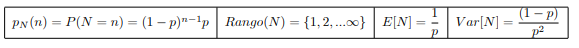

Tanto N como P deben ser ingresados por parametros, siendo P un valor entre 0 y 1.

**2. Armado de Ambiente**

No se requiere instalación previa

**3. Desarrollo**

In [ ]:
codigo = """
#include <iostream>
#include <vector>
#include <cstdlib>
#include <tgmath.h>
#include <sys/time.h>
#include <omp.h>

static double dHashTiempoHistory[3];
static struct timeval tv;

#define TIEMPO_INI( h ) \
  gettimeofday(&tv,NULL); \
  dHashTiempoHistory[h] = tv.tv_sec + tv.tv_usec/1000000.0;

#define TIEMPO_FIN( h ) \
  gettimeofday(&tv,NULL); \
  dHashTiempoHistory[h] = ((tv.tv_sec + tv.tv_usec/1000000.0) - dHashTiempoHistory[h]) * 1000;

#define TIEMPO_GET(h) dHashTiempoHistory[h]

#define HTH_TOTAL           1
#define HTH_GEO_SEC         2
#define HTH_GEO_OMP         3

//------------------------------------------------------------------

int main(int argc, char* argv[])
{
  int i;
  float resultadoSEC = 0, resultadoOMP = 0;
  TIEMPO_INI(HTH_TOTAL)

  float probabilidad = atof(argv[1]);
  int cantidad_Exp = atoi(argv[2]);

  if(argc != 3)
  {
    std::cerr<<"Error en los parametros"<<std::endl;
    exit(1);
  }

  if(probabilidad < 0 or probabilidad > 1)
  {
    std::cerr<<"El valor de probabilidad debe ir entre 0 y 1"<<std::endl;
    exit(1);
  }

  if(cantidad_Exp <= 0)
  {
    std::cerr<<"La cantidad de experiencias debe ser mayor a 0"<<std::endl;
    exit(1);
  }
  

//------------------------------------------------------------------

  std::vector<double> X(cantidad_Exp);

//------------------------------------------------------------------
//Funcion en forma secuencial

  TIEMPO_INI(HTH_GEO_SEC)

    for(i=cantidad_Exp;i>=1;i--)
    {
      X[i-1] = pow((1 - probabilidad), (i - 1)) * probabilidad;
    }

    for(i=0;i<X.size();i++)
    {
      resultadoSEC = X[i] + resultadoSEC;
    }

  TIEMPO_FIN(HTH_GEO_SEC) 

//------------------------------------------------------------------
//Funcion con OpenMP

  TIEMPO_INI(HTH_GEO_OMP)

    #pragma omp parallel for
    for(i=cantidad_Exp;i>=1;i--)
    {
      X[i-1] = pow((1 - probabilidad), (i - 1)) * probabilidad;
    }

    for(i=0;i<X.size();i++)
    {
      resultadoOMP = X[i] + resultadoOMP;
    }

  TIEMPO_FIN(HTH_GEO_OMP)

  TIEMPO_FIN(HTH_TOTAL)

//------------------------------------------------------------------
//Muestro los resultados
/*
std::cout<<"VECTOR: [";
for(i=0;i<X.size();i++)
{
  std::cout<<X[i]<<" , ";
}
std::cout<<"]"<<std::endl;*/

std::cout<<"Valores de tiempo"<<std::endl;
std::cout<<"Tiempo total: "<<TIEMPO_GET(HTH_TOTAL)<<" [ms]"<<std::endl;
std::cout<<"Tiempo SEC: "<<TIEMPO_GET(HTH_GEO_SEC)<<" [ms]"<<std::endl;
std::cout<<"Tiempo OMP: "<<TIEMPO_GET(HTH_GEO_OMP)<<" [ms]"<<std::endl;
std::cout<<"Valores probabilistico"<<std::endl;
std::cout<<"Probabilidad: "<<probabilidad<<std::endl;
std::cout<<"Cantidad exp: "<<cantidad_Exp<<std::endl;
}
"""

file = open('probgeo.cpp', 'w')
file.write(codigo)
file.close()

In [ ]:
 ! g++ -o probgeo -fopenmp probgeo.cpp

In [ ]:
%env OPM_NUM_THREADS=2
!./probgeo 0.20 30

env: OPM_NUM_THREADS=2
Valores de tiempo
Tiempo total: 0.144958 [ms]
Tiempo SEC: 0.0109673 [ms]
Tiempo OMP: 0.119925 [ms]
Valores probabilistico
Probabilidad: 0.2
Cantidad exp: 30


**4. Tabla de Pasos**

Procesador | Función | Detalle
-----------|---------|--------
CPU | #include | Se incluyen todas las librerías necesarias para ejecutar el programa
CPU | #define | Se definen macros para medir el tiempo
CPU | if argc | Se valida la cantidad de parametros
CPU | if... if... | Se valida que ambos parametros sean correctos
CPU | std::vector<double> X(cantidad_Exp); | Defino la memoria para el vector X
CPU | TIEMPO_INI(HTH_GEO_SEC) | Se inicia a contar el tiempo de la ejecución secuencial
CPU | for | Se realiza el cálculo de la distribución geométrica
CPU | for | Se obtiene el resultado
CPU | TIEMPO_FIN(HTH_GEO_SEC) | Se finaliza el tiempo de la ejecución secuencial
CPU | TIEMPO_INI(HTH_GEO_OMP) | Se inicia a contar el tiempo de la ejecución con omp
CPU | #pragma omp parallel for | Esta directiva nos indica que la parte de código que la comprende puede ser ejecutada por varios hilos
CPU | for | Se realiza el cálculo de la distribución geométrica
CPU | for | Se obtiene el resultado
CPU | TIEMPO_FIN(HTH_GEO_OMP) | Se finaliza el tiempo de la ejecución con omp
CPU | std::cout | Se muestra por pantalla los valores de tiempos y los valores de los parame


**5. Conclusión**

Ante ejecuciones de poco procesamiento, se produce que el tiempo secuencial es menor que utilizando OMP. Esa lógica no se repite al momento de procesar valores muy grandes, en estos casos hay una marcada diferencia que favorece a la utilización de OMP. Se llega a la conclusion que la utilización de OMP es recomendada para procesar mucho nivel de información

**6. Bibliografía**

Calculo de Distribución Geométrica [Link](https://mielhistorico.unlam.edu.ar/data/contenido/1111/PyEformulasv2.pdf)

Introducción a Colab [Link](https://www.youtube.com/watch?v=ICJP_ukNSQ0)

